





# Project : Job Placement Prediction
NAME:patil hitesh rejendra


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv('Job_Placement_Data.csv')
data

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [14]:
data.shape

(215, 13)

# EDA

In [15]:
data.head() #Returns Top 5 records 

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [16]:

data.info() #Returns the count of null values and the data types of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [17]:
data.describe() # Returns the statistical descriptions of the data


,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [18]:
data.isna().sum() #Returns the count of the null values


gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [19]:
data['status'].value_counts() #Returns the value counts of the "Placed" and "Not Placed" in the 'status' column


Placed        148
Not Placed     67
Name: status, dtype: int64

In [20]:
# Returns the count comparing the percentage scored in 'ssc_percentage' & 'hsc_percentage' and the 'status' as "Not Placed"
data[(data['ssc_percentage']<60) & (data['hsc_percentage']<60) & (data['status']=='Not Placed')].shape[0]


25

In [21]:
# Returns the count comparing the percentage scored in 'ssc_percentage' & 'hsc_percentage' and the 'status' as "Placed"
data[(data['ssc_percentage']<60) & (data['hsc_percentage']<60) & (data['status']=='Placed')].shape[0]

1

# Data Visualization

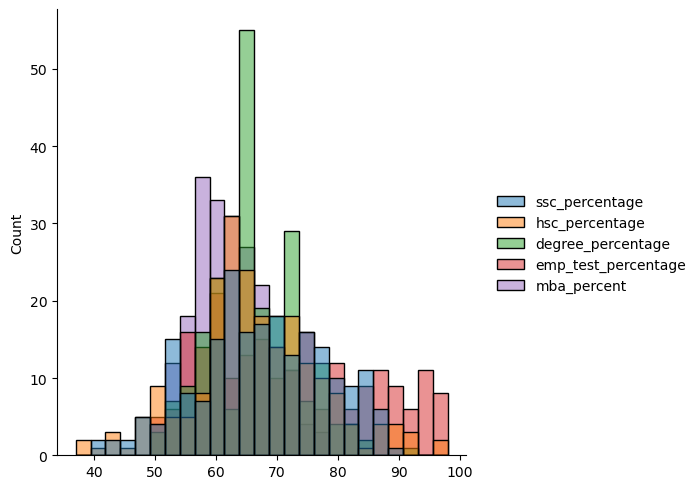

In [22]:
a=data
sns.displot(a)

<Axes: xlabel='work_experience', ylabel='emp_test_percentage'>

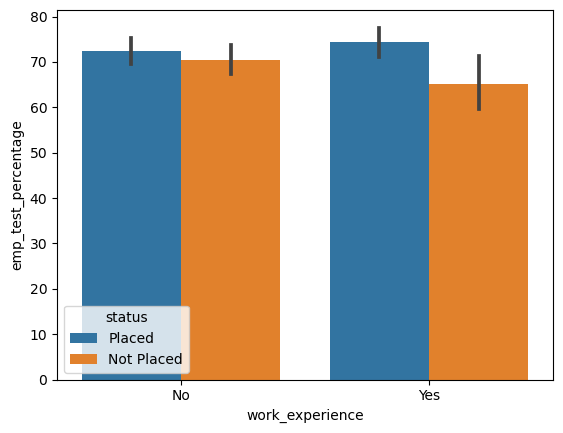

In [23]:
#Bar plot based on the 'work_experience' and 'emp_test_percentage' on the basis of 'status'
sns.barplot(x='work_experience',y='emp_test_percentage',hue='status',data=data)


<Axes: xlabel='hsc_board', ylabel='hsc_percentage'>

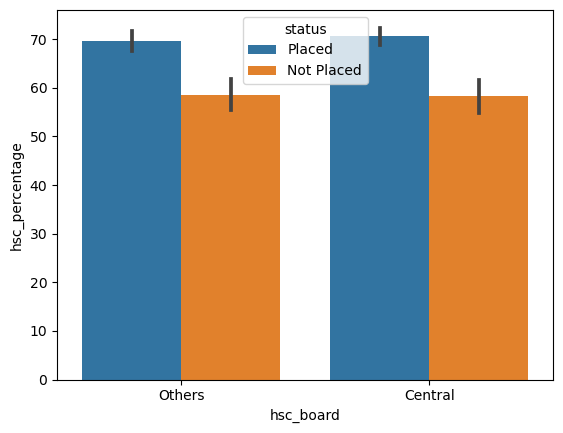

In [24]:
#Bar plot based on the 'hsc_board' and 'hsc_percentage' on the basis of 'status'
sns.barplot(x='hsc_board',y='hsc_percentage',hue='status',data=data)

<Axes: xlabel='ssc_board', ylabel='ssc_percentage'>

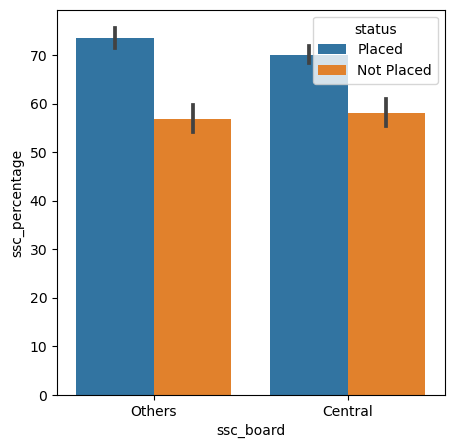

In [25]:
#Bar plot based on the 'ssc_board' and 'ssc_percentage' on the basis of 'status'
plt.figure(figsize=(5,5))
sns.barplot(x='ssc_board',y='ssc_percentage',hue='status',data=data)

<Axes: xlabel='undergrad_degree', ylabel='degree_percentage'>

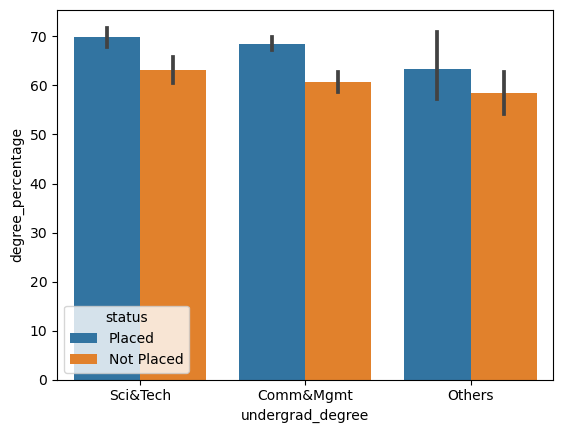

In [26]:
#Bar plot based on the 'undergrad_degree' and 'degree_percentagee' on the basis of 'status'
sns.barplot(x='undergrad_degree',y='degree_percentage',hue='status',data=data)

In [27]:
data.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

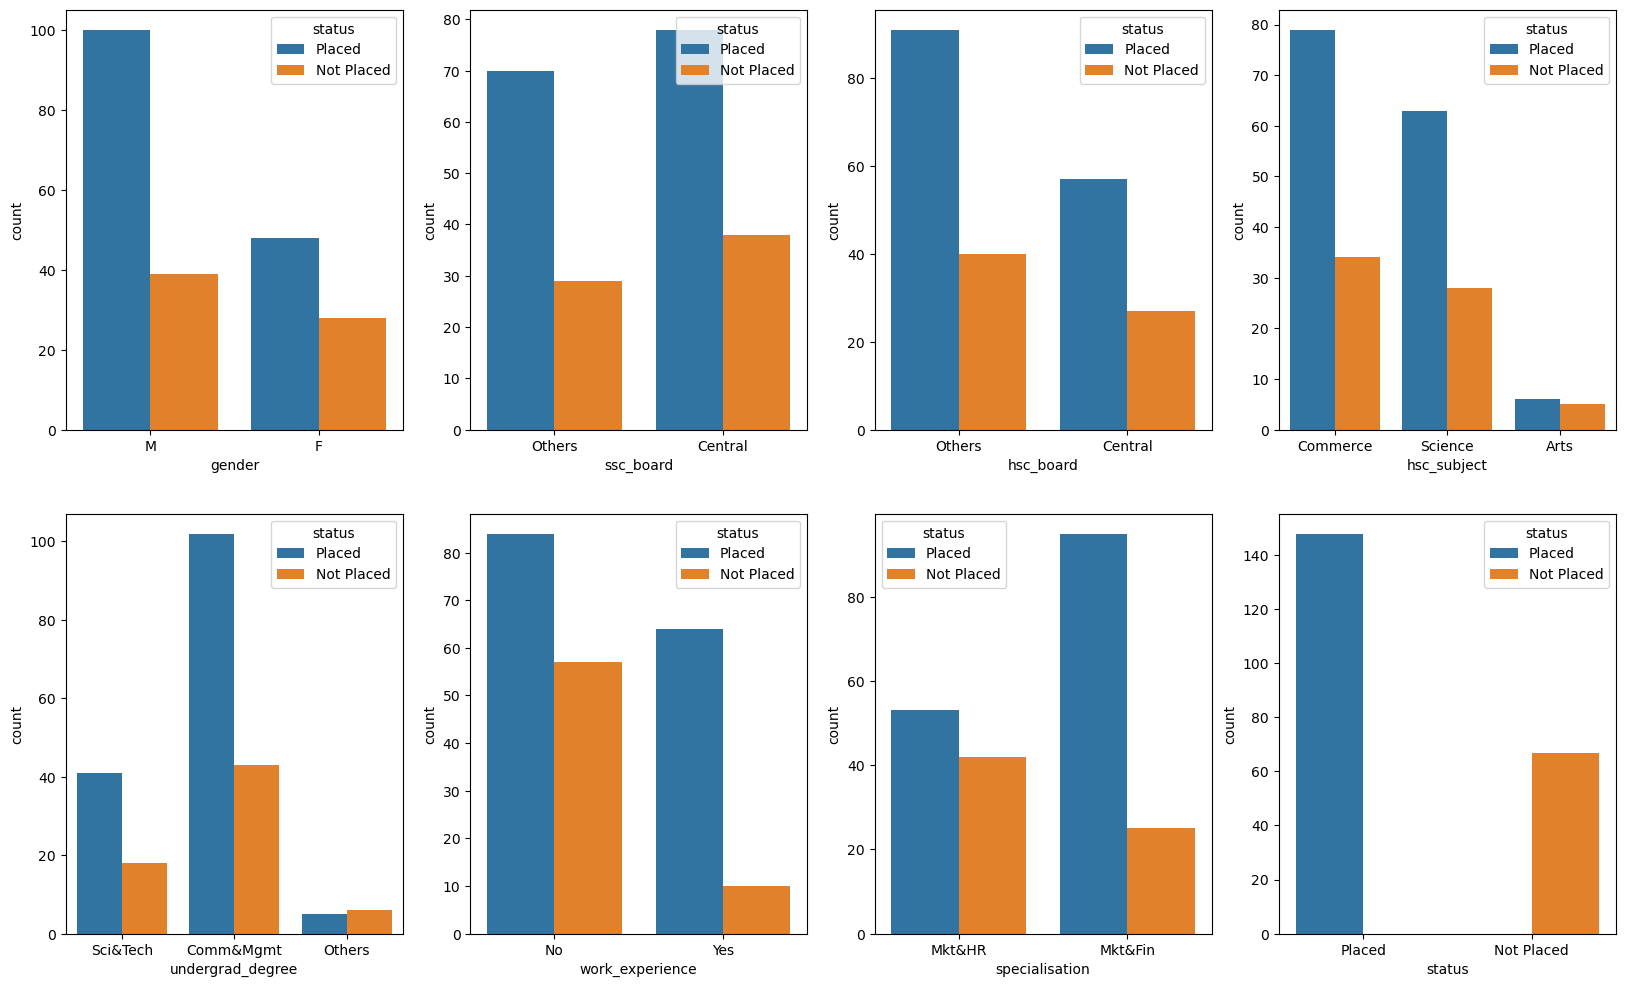

In [28]:
# Returns the Count Plot of various columns,describing the count of of "Placed" and "Not Placed" candidates
j=[]
for i in data.columns:
    if data[i].dtypes =='object':
        j.append(i)
fig,axes = plt.subplots(4,2,figsize=(20,12))
for i in range(len(j)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[j[i]],hue='status',data=data)

# LabelEncoder

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
# Using Label Encoder all the string type of data gets converted into interger type
le = LabelEncoder()
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = le.fit_transform(data[i])   

In [31]:
data.head(10)


,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.00,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.50,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.00,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.00,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.80,0,55.50,1
5,1,55.00,1,49.80,1,2,67.25,2,1,55.00,0,51.58,0
6,0,46.00,1,49.20,1,1,79.00,0,0,74.28,0,53.29,0
7,1,82.00,0,64.00,0,2,66.00,2,1,67.00,0,62.14,1
8,1,73.00,0,79.00,0,1,72.00,0,0,91.34,0,61.29,1
9,1,58.00,0,70.00,0,1,61.00,0,0,54.00,0,52.21,0


# Feature Selection using Pearson's Correlation

<Axes: >

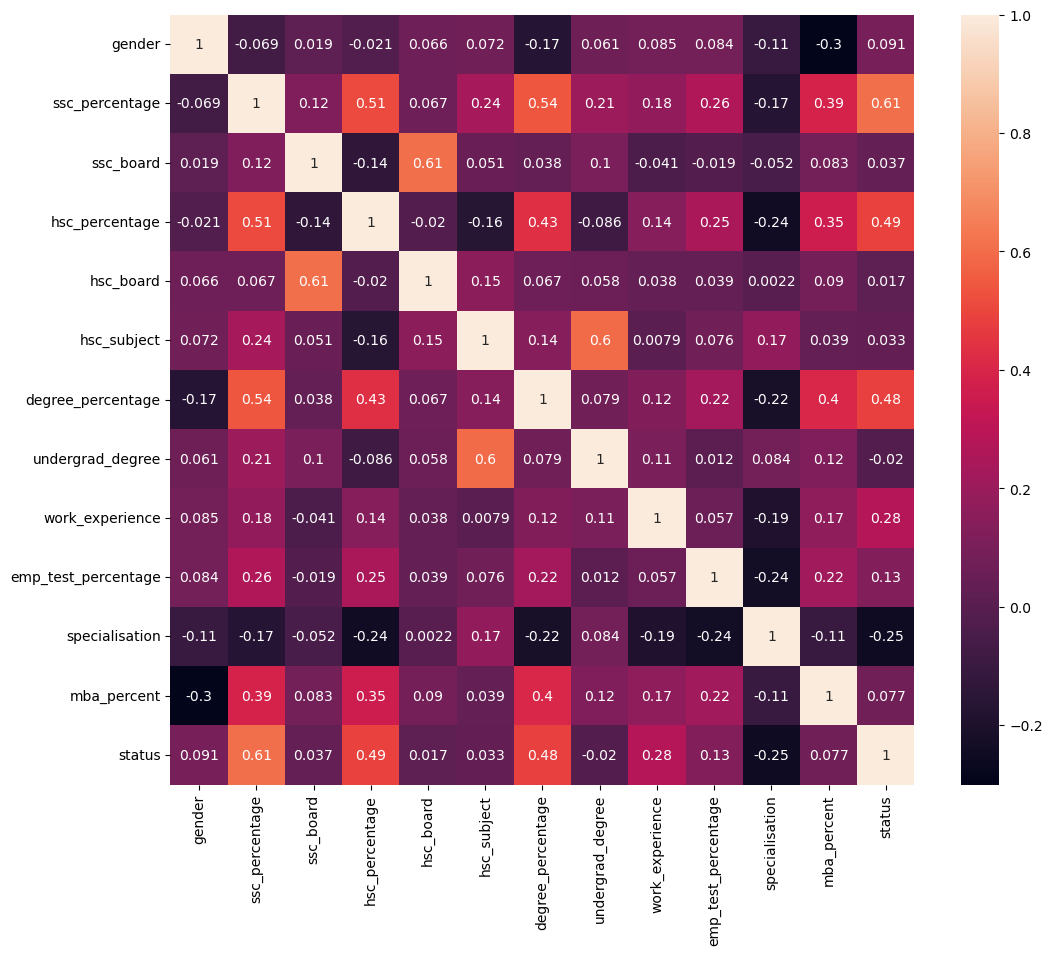

In [32]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

# Model Selection

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Independent Variables are stored in X
# Dependent Variable is stored in y

X = data.drop(['status'],axis=1)
y = data.iloc[:,-1]
X.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50


In [35]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: status, dtype: int32

In [36]:
y.shape

(215,)

# Train - Test Split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2)


In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(161, 12)
(54, 12)
(161,)
(54,)


# Model Building using Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression


In [29]:

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_pred = log_reg.predict(x_test)

In [31]:
y_pred


array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [32]:
y_test

23     1
166    1
163    1
13     1
64     1
174    1
142    1
189    0
93     0
30     1
10     1
89     1
205    1
65     0
98     1
35     1
71     1
143    1
25     0
165    0
202    1
135    1
151    1
44     1
193    1
212    1
155    0
139    1
53     1
24     1
185    1
187    1
113    1
84     1
6      0
28     1
12     0
29     0
197    1
18     0
41     0
5      0
184    0
2      1
169    0
3      0
118    1
14     0
77     1
54     1
188    0
146    1
180    1
195    1
Name: status, dtype: int32

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [34]:
con_mat = confusion_matrix(y_test,y_pred)
con_mat


array([[10,  7],
       [ 1, 36]], dtype=int64)

In [35]:
acc1 = accuracy_score(y_test,y_pred)
acc1


0.8518518518518519

# SVC

In [36]:
from sklearn.svm import SVC
svc = SVC(kernel = "poly")
svc.fit(x_train, y_train)
svc.score(x_test,y_test)

0.8703703703703703

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc =  RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
rfc.score(x_test,y_test)

0.9074074074074074

# Deployement Phase

In [39]:
input_data =(0.  , 77.4 ,  1.  , 60.  ,  1.  ,  2.  , 64.74,  2.  ,  1.  ,
       92.  ,  0.  , 63.62)
np_array = np.array(input_data)
reshaped_array = np_array.reshape(1,-1)

prediction = log_reg.predict(reshaped_array)
if prediction[0]==1:
    print('preson is placed')
else:
    print('person is not placed')

preson is placed


In [40]:
data

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1


In [41]:
x_test.iloc[2,:].values

array([ 1.  , 63.  ,  1.  , 67.  ,  1.  ,  2.  , 64.  ,  2.  ,  0.  ,
       75.  ,  0.  , 66.46])

# CV

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [38]:
model_df = {}
def model_val(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                    test_size=0.20,
                                                    random_state=42)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'{model} accuracy is {accuracy_score(y_test,y_pred)}')
    
    score = cross_val_score(model,x,y,cv=5)
    print(f'{model} Avg cross val score is {np.mean(score)}')
    model_df[model] = round(np.mean(score)*100,2)

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.9069767441860465
LogisticRegression() Avg cross val score is 0.841860465116279


In [41]:
from sklearn.ensemble import RandomForestClassifier
model1 =  RandomForestClassifier()
model_val(model1,X,y)

RandomForestClassifier() accuracy is 0.7906976744186046
RandomForestClassifier() Avg cross val score is 0.8418604651162791


In [42]:
from sklearn.svm import SVC
model2 =  SVC()
model_val(model2,X,y)

SVC() accuracy is 0.7674418604651163
SVC() Avg cross val score is 0.8325581395348838
